In [1]:
#from face_recognition import FaceRecognition

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score

import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import random
import numpy as np
import cv2
import base64
from tqdm import tqdm
import requests
from pprint import pprint

In [2]:
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score


In [3]:
#ROOT_FOLDER ="/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/"
ROOT_FOLDER ="./lfw-deepfunneled/lfw-deepfunneled/"
MODEL_PATH = "lfw_model.pkl"

In [4]:
dataset = []
for path in glob.iglob(os.path.join(ROOT_FOLDER, "**", "*.jpg")):
    person = path.split("/")[-2]
    dataset.append({"person":person, "path": path})
    
dataset = pd.DataFrame(dataset)
dataset = dataset.groupby("person").filter(lambda x: len(x) > 8)
dataset.head(20)

,path,person
2,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
3,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
4,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
5,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
6,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
7,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
8,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
9,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
10,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz
11,./lfw-deepfunneled/lfw-deepfunneled/Paul_Wolfo...,Paul_Wolfowitz


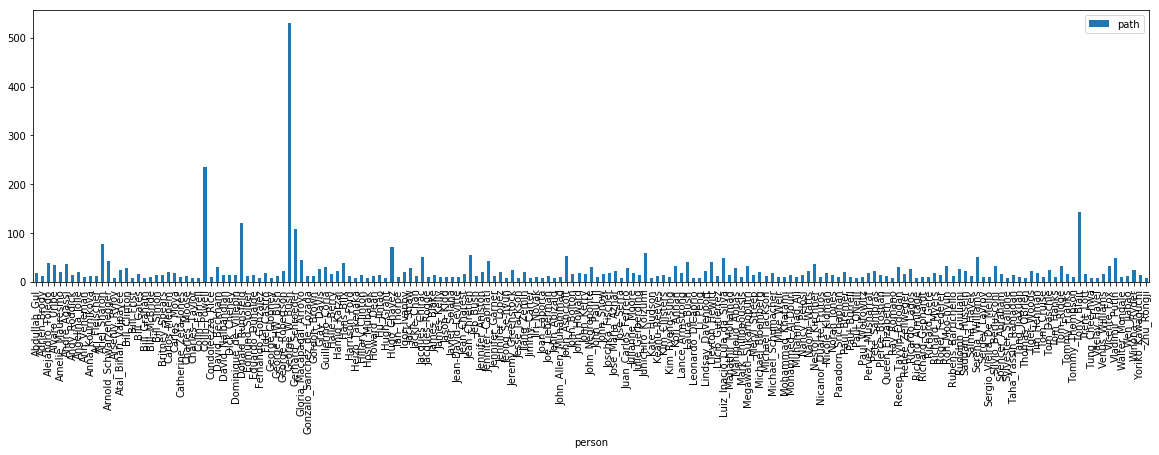

In [5]:
dataset.groupby("person").count()[:200].plot(kind='bar', figsize=(20,5))

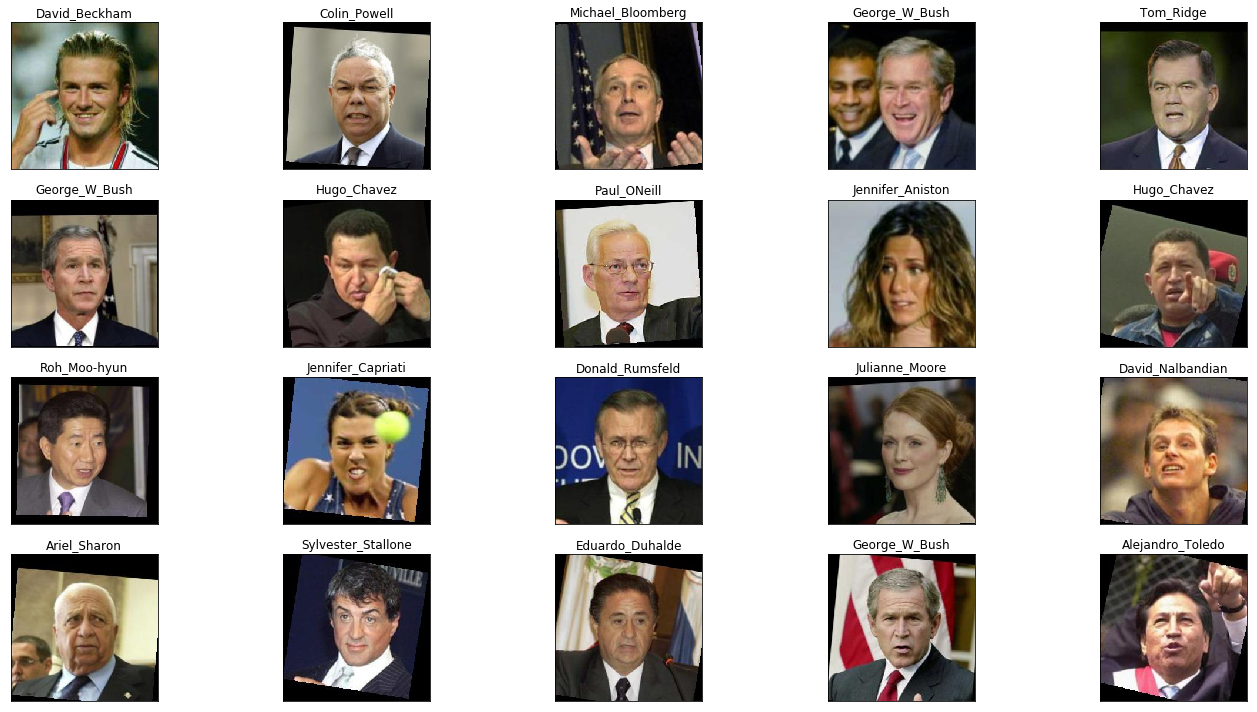

In [6]:
plt.figure(figsize=(20,10))
for i in range(20):
    idx = random.randint(0, len(dataset))
    img = plt.imread(dataset.path.iloc[idx])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset.person.iloc[idx])
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [7]:
train, test = train_test_split(dataset, test_size=0.1, random_state=0)
print("Train:",len(train))
print("Test:",len(test))
print(train['person'].nunique())

Train: 4110
Test: 457
185


In [8]:
train[train['person']=='Arseniy_Rylov']
#dataset[dataset['person']=='Lleyton_Hewitt']
#dataset[dataset['person']=='Arseniy_Rylov']
#dataset.tail()
dataset.nunique()
#train.loc[train['person']=='Mahathir_Mohamad']
#train['person']

path      4567
person     185
dtype: int64

In [9]:
#import tensorflow as tf
#tf.reset_default_graph()

from face_recognition import FaceRecognition


Using TensorFlow backend.


In [15]:
fr.load(MODEL_PATH)
#next go two blocks lower

In [10]:
#tf.reset_default_graph()
#%%time
#fr = FaceRecognition()
#from face_recognition import FaceRecognition

fr = FaceRecognition()

In [11]:
fr.fit_from_dataframe(train)

100%|██████████| 4110/4110 [05:58<00:00, 11.45it/s]


In [12]:
fr.save(MODEL_PATH)

In [13]:
%%time
y_test, y_pred, y_scores = [],[],[]
for idx in tqdm(range(len(test))):
    path = test.path.iloc[idx]
    result = fr.predict(path)
    for prediction in result["predictions"]:
        y_pred.append(prediction["person"])
        y_scores.append(prediction["confidence"])
        y_test.append(test.person.iloc[idx])

100%|██████████| 457/457 [00:47<00:00,  9.64it/s]

CPU times: user 2min 40s, sys: 2min 42s, total: 5min 22s
Wall time: 47.4 s


In [16]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

             Abdullah_Gul       0.67      1.00      0.80         2
             Adrien_Brody       1.00      0.50      0.67         2
         Alejandro_Toledo       0.80      1.00      0.89         4
             Alvaro_Uribe       1.00      0.80      0.89         5
          Amelie_Mauresmo       1.00      1.00      1.00         2
             Andre_Agassi       1.00      1.00      1.00         6
           Angelina_Jolie       0.50      1.00      0.67         2
              Ann_Veneman       1.00      1.00      1.00         1
          Anna_Kournikova       1.00      0.50      0.67         2
             Ariel_Sharon       1.00      1.00      1.00         4
    Arnold_Schwarzenegger       1.00      0.50      0.67         2
            Arseniy_Rylov       0.67      1.00      0.80         2
     Atal_Bihari_Vajpayee       1.00      1.00      1.00         3
             Bill_Clinton       1.00      1.00      1.00     

In [22]:
print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

             Abdullah_Gul       0.67      1.00      0.80         2
             Adrien_Brody       1.00      0.50      0.67         2
         Alejandro_Toledo       0.80      1.00      0.89         4
             Alvaro_Uribe       1.00      0.80      0.89         5
          Amelie_Mauresmo       1.00      1.00      1.00         2
             Andre_Agassi       1.00      1.00      1.00         6
           Angelina_Jolie       0.50      1.00      0.67         2
              Ann_Veneman       1.00      1.00      1.00         1
          Anna_Kournikova       1.00      0.50      0.67         2
             Ariel_Sharon       1.00      1.00      1.00         4
    Arnold_Schwarzenegger       1.00      0.50      0.67         2
            Arseniy_Rylov       0.67      1.00      0.80         2
     Atal_Bihari_Vajpayee       1.00      1.00      1.00         3
             Bill_Clinton       1.00      1.00      1.00     

In [17]:
print("Accuracy: %f" % accuracy_score(y_test, y_pred))
#print("Accuracy: %f" % precision(y_test, y_pred))
#print("Accuracy: %f" % f1_score(y_test, y_pred))

Accuracy: 0.883588


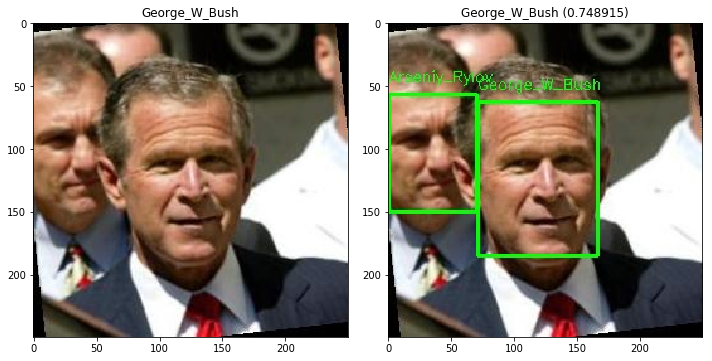

In [63]:
person = "George_W_Bush"
#path = test[test.person==person]["path"].iloc[0]
path = './lfw-deepfunneled/lfw-deepfunneled/George_W_Bush/George_W_Bush_0151.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(person)
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()
plt.show()

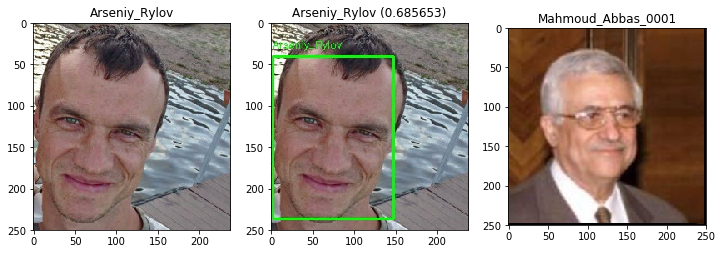

In [64]:
person = "Arseniy_Rylov"
#path = test[test.person==person]["path"].iloc[1]
path='Arseniy_Rylov_010.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(person)

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()

plt.subplot(1, 3, 3)
im_mahm=cv2.imread('./lfw-deepfunneled/lfw-deepfunneled/Mahmoud_Abbas/Mahmoud_Abbas_0001.jpg')
im_mahm=cv2.cvtColor(im_mahm, cv2.COLOR_BGR2RGB)
plt.imshow(im_mahm)
plt.title("Mahmoud_Abbas_0001")

plt.show()

In [62]:
#path
#result
#fr.face_encoding
for i in test["path"]:
    result = fr.predict(i)
    #if result["predictions"][0]["person"]=='Arseniy_Rylov':
    for j in range(len(result["predictions"])):
        if result["predictions"][j]["person"]=='Arseniy_Rylov':
            print(i, j, result["predictions"][j]["person"])

./lfw-deepfunneled/lfw-deepfunneled/Arseniy_Rylov/Arseniy_Rylov_002.jpg 0 Arseniy_Rylov
./lfw-deepfunneled/lfw-deepfunneled/Arseniy_Rylov/Arseniy_Rylov_004.jpg 0 Arseniy_Rylov
./lfw-deepfunneled/lfw-deepfunneled/George_W_Bush/George_W_Bush_0151.jpg 1 Arseniy_Rylov


In [58]:
#test[test.person==person]
result["predictions"]

[{'person': 'UNKNOWN', 'confidence': 0.0, 'box': (195, 104, 242, 163)},
 {'person': 'Li_Peng',
  'confidence': 0.7568473070859909,
  'box': (91, 62, 182, 186)}]

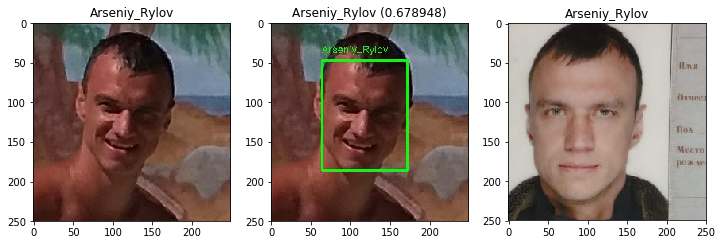

In [37]:
#After_training
person = "Arseniy_Rylov"
path = test[test.person==person]["path"].iloc[0]
#path='for_facebook_3.png'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

result = fr.predict(path)
file_bytes = np.fromstring(base64.b64decode(result["frame"]), np.uint8)
output = cv2.imdecode(file_bytes,1)

plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title(person)

plt.subplot(1, 3, 2)
plt.imshow(output)
plt.title("%s (%f)" % (result["predictions"][0]["person"], result["predictions"][0]["confidence"]))
plt.tight_layout()

plt.subplot(1, 3, 3)
im_mahm=cv2.imread('./lfw-deepfunneled/lfw-deepfunneled/Arseniy_Rylov/Arseniy_Rylov_005.jpg')
im_mahm=cv2.cvtColor(im_mahm, cv2.COLOR_BGR2RGB)
plt.imshow(im_mahm)
plt.title(result["predictions"][0]["person"])

plt.show()